<a href="https://colab.research.google.com/github/RaoSharjeelKhan/Machine-Learning/blob/main/Titanic_Competition(98.5%25__accuracy).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from lazypredict.Supervised import LazyClassifier

In [157]:
df_train=pd.read_csv('train.csv',index_col='PassengerId')
print('Shape of Training Dataset: ',df_train.shape)
print('---'*5)
df_test=pd.read_csv('test.csv',index_col='PassengerId')
print('Shape of Testing Dataset: ',df_test.shape)
print('---'*5)
df_result=pd.read_csv('gender_submission.csv',index_col='PassengerId')
print('Shape of Result of Testing Dataset: ',df_result.shape)

Shape of Training Dataset:  (891, 11)
---------------
Shape of Testing Dataset:  (418, 10)
---------------
Shape of Result of Testing Dataset:  (418, 1)


In [168]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.00,1,0,7.25,S
2,1,1,female,38.00,1,0,71.28,C
3,1,3,female,26.00,0,0,7.92,S
4,1,1,female,35.00,1,0,53.10,S
5,0,3,male,35.00,0,0,8.05,S


In [158]:
#Removing unnecessary features from the Datasets
df_train=df_train.drop(['Name','Ticket','Cabin'],axis=1)
df_test=df_test.drop(['Name','Ticket','Cabin'],axis=1)

In [159]:
# First we check whether we have empty values or not
df_missing=pd.DataFrame({'Training Dataset':df_train.isnull().sum(),
                          'Testing Dataset':df_test.isnull().sum()})
df_missing

,Training Dataset,Testing Dataset
Age,177,86.00
Embarked,2,0.00
Fare,0,1.00
Parch,0,0.00
Pclass,0,0.00
Sex,0,0.00
SibSp,0,0.00
Survived,0,NaN


In [160]:
df_train.Age=df_train.Age.fillna(df_train['Age'].median())
df_test.Age=df_test.Age.fillna(df_test['Age'].median())
df_test.Fare=df_test.Age.fillna(df_test['Fare'].median())
df_train=df_train.dropna()

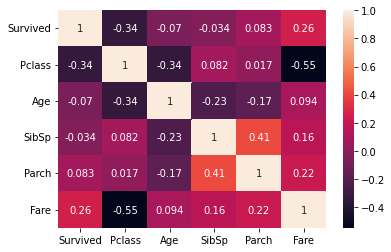

In [161]:
sns.heatmap(df_train.corr(),annot=True);

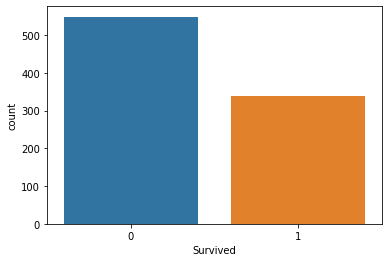

In [162]:
sns.countplot(x=df_train.Survived,data=df_train)
plt.show()

In [163]:
X_train=df_train.drop('Survived',axis=1)
y_train=df_train['Survived']
X_test=df_test.copy()
y_test=df_result.copy()

In [164]:
object_cols=['Sex','Embarked']

In [165]:
OH_encoder=OneHotEncoder(sparse=False)
X_train_transformed=pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
X_test_transformed=pd.DataFrame(OH_encoder.fit_transform(X_test[object_cols]))
# One-hot encoding removed index; put it back
X_train_transformed.index = X_train.index
X_test_transformed.index = X_test.index

# Remove categorical columns (will replace with one-hot encoding)
X_train = X_train.drop(object_cols, axis=1)
X_test = X_test.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
X_train = pd.concat([X_train, X_train_transformed], axis=1)
X_test = pd.concat([X_test, X_test_transformed], axis=1)

In [152]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:01<00:00, 24.44it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NuSVC,0.98,0.98,0.98,0.98,0.05
LinearDiscriminantAnalysis,0.97,0.97,0.97,0.97,0.02
RidgeClassifierCV,0.97,0.97,0.97,0.97,0.02
RidgeClassifier,0.97,0.97,0.97,0.97,0.01
LinearSVC,0.97,0.96,0.96,0.97,0.05
CalibratedClassifierCV,0.97,0.96,0.96,0.97,0.14
BernoulliNB,0.95,0.96,0.96,0.95,0.01
LogisticRegression,0.95,0.95,0.95,0.95,0.02
NearestCentroid,0.93,0.95,0.95,0.93,0.01


In [171]:
from sklearn.svm import NuSVC
model1=NuSVC()
model1.fit(X_train,y_train)
y_pred1 = model1.predict(X_test)
print('----'*5,'Accuracy :',accuracy_score(y_test,y_pred1),'----'*5)

-------------------- Accuracy : 0.9856459330143541 --------------------


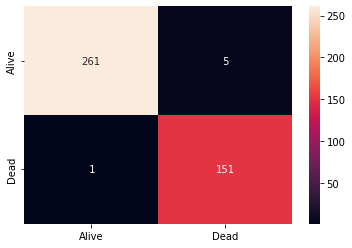

In [167]:
cm=confusion_matrix(y_test, y_pred1)
sns.heatmap(cm,annot=True, fmt='2g',xticklabels=['Alive','Dead'], yticklabels=['Alive','Dead']);

In [178]:
submission = pd.DataFrame({'PassengerId':X_test.index,'Survived':y_pred1})
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [180]:
submission.to_csv('SUBMISSION.csv',index = False)